### Hello World Graph

In [22]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph,START,END

In [14]:
class AgentState(TypedDict):
    name:str    

In [ ]:
def compliment_node(state:AgentState) -> AgentState:
    """Simple node that compliments the user"""
    state['name'] = state['name'] + " you're doing an amazing job learning LangGraph!"
    return state

In [20]:
graph = StateGraph(AgentState)

graph.add_node("compliment", compliment_node)

graph.set_entry_point("compliment")
graph.set_finish_point("compliment")

app = graph.compile()

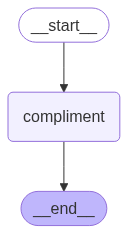

In [17]:
from IPython.display import Image, display 

display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
app.invoke({"name":"Pasindu"})

{'name': "Pasindu you're doing an amazing job learning LangGraph!"}

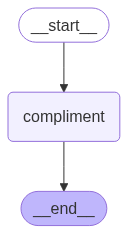

In [24]:
graph = StateGraph(AgentState)

graph.add_node("compliment", compliment_node)

graph.add_edge(START,"compliment")
graph.add_edge("compliment",END)

app = graph.compile()

from IPython.display import Image, display 

display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
app.invoke({"name":"Jhon"})

{'name': "Jhon you're doing an amazing job learning LangGraph!"}

### Multiple Inputs Graph

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    values:List[int]
    name:str
    result:str

In [8]:
def process_values(state:AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    print(state)
    state['result'] = f"Hi there {state['name']}, Your sum = {sum(state['values'])}"
    print(state)
    return state

In [9]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)

graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

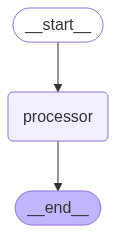

In [10]:
from IPython.display import Image, display 

display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
answer = app.invoke({"name":"pasindu","values":[12,15,17]})

{'values': [12, 15, 17], 'name': 'pasindu'}
{'values': [12, 15, 17], 'name': 'pasindu', 'result': 'Hi there pasindu, Your sum = 44'}


In [12]:
answer

{'values': [12, 15, 17],
 'name': 'pasindu',
 'result': 'Hi there pasindu, Your sum = 44'}

In [15]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import math

In [13]:
class AgentState(TypedDict):
    values:List[int]
    name:str
    operation:str
    result:str

In [16]:
def process_operation(state:AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    if state['operation'] == "+":
        state['result'] = f"Hi {state['name']} your answer is {sum(state['values'])}"
    elif state['operation'] == "*":
        state['result'] = f"Hi {state['name']} your answer is {math.prod(state['values'])}"
    else:
        state['result'] = "Invalid"
    return state

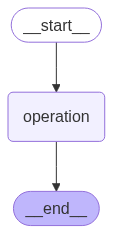

In [17]:
graph = StateGraph(AgentState)

graph.add_node('operation', process_operation)

graph.add_edge(START, "operation")
graph.add_edge('operation', END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
answer = app.invoke({"name":"Jhon", "values":[1,2,3,4], 'operation':"*"})
answer

{'values': [1, 2, 3, 4],
 'name': 'Jhon',
 'operation': '*',
 'result': 'Hi Jhon your answer is 24'}

In [19]:
answer = app.invoke({"name":"Jhon", "values":[1,2,3,4], 'operation':"+"})
answer

{'values': [1, 2, 3, 4],
 'name': 'Jhon',
 'operation': '+',
 'result': 'Hi Jhon your answer is 10'}

### Sequential Node Graph

In [20]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [24]:
class AgentState(TypedDict):
    name: str
    age: int
    final: str

In [30]:
def first_node(state:AgentState) -> AgentState:
    """This is first node of the sequence"""
    state['final'] = f"Hi, {state['name']}, "
    return state

def second_node(state:AgentState) -> AgentState:
    """This is second node of the sequence"""
    state['final'] = state['final'] + f"you are {state['age']} years old."
    return state

In [31]:
graph = StateGraph(AgentState)

graph.add_node('first_node', first_node)
graph.add_node('second_node', second_node)

graph.set_entry_point('first_node')
graph.add_edge('first_node','second_node')
graph.set_finish_point('second_node')

app = graph.compile()

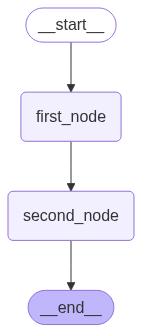

In [32]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [33]:
answer = app.invoke({"name":"Jhon","age":20})

In [34]:
answer

{'name': 'Jhon', 'age': 20, 'final': 'Hi, Jhon, you are 20 years old.'}

### Conditional Graph

In [35]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [36]:
class AgentState(TypedDict):
    number1:int
    operation:str
    number2:int
    finalNumber:int

In [ ]:
def adder(state:AgentState) -> AgentState:
    """this node add 2 number"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state:AgentState) -> AgentState:
    """this node subtract 2 number"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    if state['operation'] == "+":
        return "addition_operation"
    
    elif state['operation'] == "-":
        return "subtraction_operation"

In [41]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) #passthrough function

graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router',
    decide_next_node,
    {
        #Edge:Node
        "addition_operation":"add_node",
        "subtraction_operation":"subtract_node"
    }
)

graph.add_edge("add_node",END)
graph.add_edge('subtract_node', END)

app = graph.compile()

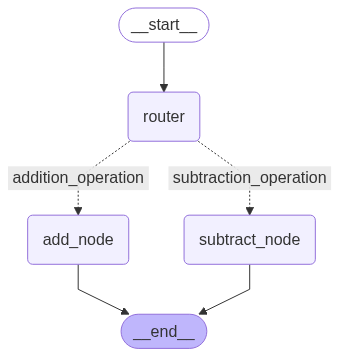

In [42]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [43]:
initial_state = AgentState(number1=10,number2=5,operation="+")
initial_state

{'number1': 10, 'number2': 5, 'operation': '+'}

In [44]:
print(app.invoke(initial_state))

{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}


In [45]:
initial_state = AgentState(number1=10,number2=5,operation="-")
initial_state

{'number1': 10, 'number2': 5, 'operation': '-'}

In [46]:
print(app.invoke(initial_state))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


### Looping Graph

In [47]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [48]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [50]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hi there, {state['name']}"
    state["counter"] = 0 

    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state


def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"  # Continue looping
    else:
        return "exit"  # Exit the loop

In [ ]:
# greeting → random → random → random → random → random → END

In [52]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")


graph.add_conditional_edges(
    "random",     # Source node
    should_continue, # Action
    {
        "loop": "random",  
        "exit": END          
    }
)

graph.set_entry_point("greeting")

app = graph.compile()

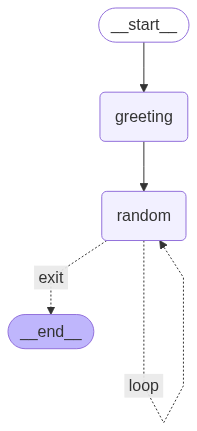

In [53]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [54]:

app.invoke({"name":"Vaibhav", "number":[], "counter":-100})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Vaibhav', 'number': [10, 2, 6, 9, 1], 'counter': 5}

In [56]:
from langchain_openai import ChatOpenAI